
## Step 1: Reading the data

1. Go to [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)
2. If you scroll down the page a bit, you'll see a data dictionary explaining each of the columns. Take a minute to familiarize yourself with how the csv is structured.
4. Download the `train.csv` file into this lab folder.
3. Create an iPython notebook and load the csv into pandas.


In [1]:
#Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load data in dataframe
titanic = pd.read_csv('./train.csv')

In [3]:
#Check the dataframe
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Find the average age of those who survived and those who did not
#Select rows where Survived = 1
survived = titanic.loc[titanic['Survived']==1]['Age'].mean()
survived

28.343689655172415

In [5]:
did_not_survive = titanic.loc[titanic['Survived']==0]['Age'].mean()
did_not_survive

30.62617924528302


## Step 2: Cleaning the data
1. Create a bar chart showing how many missing values are in each column
  - *Bonus* : Theres a good library for visualizing missing values called Missingno.
      - [Install Instructions](https://pypi.org/project/missingno/)
      - [Usage Documentation](https://github.com/ResidentMario/missingno)
2. Which column has the most `NaN` values? How many cells in that column are empty?
3. Delete all rows where `Embarked` is empty
4. Fill all empty cabins with **¯\\_(ツ)_/¯**

Note: `NaN`, empty, and missing are synonymous.

In [6]:
#Create a bar chart showing how many missing values are in each column
#Sum up the null values for each column
null = titanic.isnull().sum()

Text(0.5, 1.0, 'Number of NaN Values')

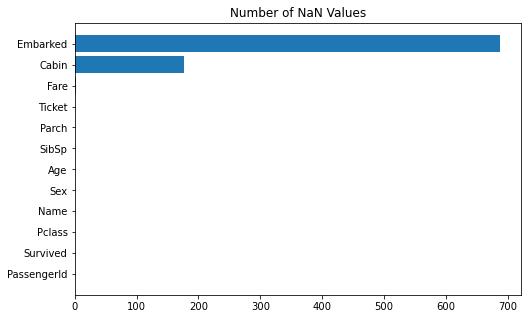

In [7]:
#create the bar chart
plt.figure(figsize=(8, 5))
plt.barh(['PassengerId', 
         'Survived', 
         'Pclass', 
         'Name', 
         'Sex', 
         'Age', 
         'SibSp', 
         'Parch', 
         'Ticket', 
         'Fare', 
         'Cabin', 
         'Embarked'], 
        sorted(null))
plt.title('Number of NaN Values')

In [8]:
#Which column has the most NaN values? How many cells in that column are empty?
#Cabin, 687
null

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
null.max()

687

In [10]:
#Select all rows where Embarked is empty
empty_embarked = titanic.loc[titanic['Embarked'].isnull()]
empty_embarked

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [11]:
#Drop the rows
titanic.drop(titanic[titanic['Embarked'].isnull()].index, inplace = True)

In [12]:
#Check if it's dropped
titanic.loc[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [13]:
#Select all empty cabins
titanic.loc[titanic['Cabin'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [14]:
titanic.loc[titanic['Cabin'].isnull()].shape

(687, 12)

In [15]:
#Fill all empty cabins with ¯\(ツ)/¯
titanic['Cabin'].fillna('¯\(ツ)/¯', inplace = True)

## Step 3: Feature extraction
1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.
2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
  - Familiarize yourself with the [`pd.get_dummies` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - BONUS: Extract the title from everyone's name and create dummy columns

In [16]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S


In [17]:
#SibSp = # of siblings / spouses aboard the Titanic	
#Parch = # of parents / children aboard the Titanic	
titanic['FamilyCount'] = titanic['SibSp'] + titanic['Parch']

In [18]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0


In [19]:
#set the whole column to be 0 first
titanic['isReverend'] = 0

In [20]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,isReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0


In [21]:
#Reverends have a special title in their name. Create a column called IsReverend: 1 if they're a preacher, 0 if they're not.
titanic.loc[titanic['Name'].str.contains('Rev'), 'isReverend'] = 1

In [22]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,isReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,¯\(ツ)/¯,Q,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,¯\(ツ)/¯,S,4,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,¯\(ツ)/¯,S,2,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,¯\(ツ)/¯,C,1,0


In [23]:
titanic.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,isReverend
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,¯\(ツ)/¯,S,0,0
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,¯\(ツ)/¯,S,0,0
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,¯\(ツ)/¯,S,0,0
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,¯\(ツ)/¯,S,0,0
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,¯\(ツ)/¯,Q,5,0
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,¯\(ツ)/¯,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,¯\(ツ)/¯,S,3,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,¯\(ツ)/¯,Q,0,0


In [24]:
#Step 3: Number 3
# Using the pd.get_dummies 
dum_embark = pd.get_dummies(titanic['Embarked'])

In [25]:
dum_embark

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [26]:
#Creating new column names that correspond to the C, Q and S values in the Embarked column
dum_embark.columns = ['Embarked_C', 'Embarked_Q', 'Embarked_S']

In [27]:
#calling the new dum_embark df to see if changes worked
dum_embark.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [28]:
# Using the pd.get_dummies 
dum_gender = pd.get_dummies(titanic['Sex'])

In [29]:
dum_gender

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [30]:
dum_gender.columns = ['Sex_Female', 'Sex_Male']

In [31]:
dum_gender.head()

,Sex_Female,Sex_Male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [32]:
#Combine all tog
new_titanic = pd.concat((titanic, dum_embark, dum_gender), axis = 1)

In [33]:
new_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,isReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_Female,Sex_Male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,¯\(ツ)/¯,S,0,1,0,0,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,0,0,1,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,¯\(ツ)/¯,S,3,0,0,0,1,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0,1,0,0,0,1


In [34]:
#split the name
titanic['Title'] = titanic['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())
#[1] means keep the second part after splitting. 
#[0]means keep the first part after splitting

In [35]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,isReverend,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,Mr


In [36]:
#find the distinct title
titanic['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [37]:
#Number of unique titles
titanic['Title'].nunique()

17

In [38]:
dum_title = pd.get_dummies(titanic['Title'])

In [39]:
dum_title

,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
887,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
888,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
889,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## Step 4: Exploratory analysis 
_[`df.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) may be very useful._

1. What was the survival rate overall?
2. Which gender fared the worst? What was their survival rate?
3. What was the survival rate for each `Pclass`?
4. Did any reverends survive? How many?
5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**
6. What is the survival rate for people whose `Age` is empty?
7. What is the survival rate for each port of embarkation?
8. What is the survival rate for children (under 12) in each `Pclass`?
9. Did the captain of the ship survive? Is he on the list?
10. Of all the people that died, who had the most expensive ticket? How much did it cost?
11. Does having family on the boat help or hurt your chances of survival?

In [40]:
#What was the survival rate overall?
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilyCount,isReverend
count,889.000000,889.000000,889.000000,712.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681,0.906637,0.006749
std,256.998173,0.486260,0.834700,14.492933,1.103705,0.806761,49.697504,1.614703,0.081922
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000,1.000000


In [41]:
#Average that survived is 38%

In [42]:
#Which gender fared the worst? What was their survival rate?
titanic[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.740385
1,male,0.188908


In [43]:
#Males fared the worse with a survival rate of 18.9%

In [44]:
#What was the survival rate for each Pclass?
titanic[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.626168
1,2,0.472826
2,3,0.242363


In [45]:
#Did any reverends survive? How many?
titanic[["isReverend", "Survived"]].groupby(['isReverend'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,isReverend,Survived
0,0,0.385051
1,1,0.000000


In [46]:
#No Reverend survived

In [47]:
#What is the survival rate for cabins marked ¯\(ツ)/¯
titanic[["Cabin", "Survived"]].groupby(['Cabin'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Cabin,Survived
50,C106,1.0
59,C148,1.0
71,C54,1.0
70,C52,1.0
69,C50,1.0
...,...,...
53,C118,0.0
52,C111,0.0
51,C110,0.0
121,E31,0.0


In [48]:
#first filter those that are marked
cabin_marked = titanic.loc[titanic["Cabin"] == "¯\(ツ)/¯"]

In [49]:
cabin_marked[["Cabin", "Survived"]].groupby(['Cabin'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Cabin,Survived
0,¯\(ツ)/¯,0.299854


In [50]:
#The survival rate was 30%

In [51]:
#What is the survival rate for people whose Age is empty?

In [52]:
#Try to create Age Group
titanic['Age_Group'] = "Available"

In [53]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,isReverend,Title,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,Mr,Available
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,Mrs,Available
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,Miss,Available
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,Mrs,Available
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,Mr,Available


In [54]:
titanic.loc[titanic['Age'].isnull(), 'Age_Group'] = "Missing"

In [55]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,isReverend,Title,Age_Group
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,¯\(ツ)/¯,S,0,1,Rev,Available
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,0,0,Miss,Available
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,¯\(ツ)/¯,S,3,0,Miss,Missing
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,0,0,Mr,Available
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,¯\(ツ)/¯,Q,0,0,Mr,Available


In [56]:
titanic[["Age_Group", "Survived"]].groupby(['Age_Group'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age_Group,Survived
0,Available,0.404494
1,Missing,0.293785


In [57]:
#Survival Rate of missing Age is 29%

In [58]:
#What is the survival rate for each port of embarkation?

In [59]:
titanic[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [60]:
#What is the survival rate for children (under 12) in each Pclass?

In [61]:
under_12 = titanic.loc[titanic["Age"] < 12]

In [62]:
under_12[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.750000
1,2,1.000000
2,3,0.404255


In [63]:
#Did the captain of the ship survive? Is he on the list?

In [64]:
#Find the captain on the list
titanic.loc[titanic["Title"] == "Capt"]
#Yes, captain is on the lsit.
#No, he did not survive

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,isReverend,Title,Age_Group
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,2,0,Capt,Available


In [65]:
#Of all the people that died, who had the most expensive ticket? How much did it cost?

In [66]:
#filter those who didnt survive
titanic.loc[titanic["Survived"] == 0].sort_values(by='Fare', ascending=False)
#263

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,isReverend,Title,Age_Group
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,5,0,Mr,Available
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,5,0,Mr,Available
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,1,0,Mr,Available
557,558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,¯\(ツ)/¯,C,0,0,Mr,Missing
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S,0,0,Mr,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0000,¯\(ツ)/¯,S,0,0,Mr,Available
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S,0,0,Mr,Missing
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,¯\(ツ)/¯,S,0,0,Mr,Missing
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0000,¯\(ツ)/¯,S,0,0,Mr,Missing


In [67]:
#Does having family on the boat help or hurt your chances of survival?

In [68]:
#Group up into with or without family
titanic["Family"] = "Yes"

In [69]:
titanic.loc[titanic['FamilyCount'] == 0, 'Family'] = "No"

In [70]:
titanic["Family"].value_counts()

No     535
Yes    354
Name: Family, dtype: int64

In [71]:
titanic[["Family", "Survived"]].groupby(['Family'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Family,Survived
1,Yes,0.505650
0,No,0.300935


In [72]:
#Yes, having family on boat helped chances of survival

## Step 5: Plotting
Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.


In [73]:
#Your code here 
"""# calculate values for each survival status
survivors_class = survivors_data.groupby(['Pclass']).size().values
non_survivors_class = non_survivors_data.groupby(['Pclass']).size().values

# calculate totals for percentates
totals = survivors_class + non_survivors_class

# use calculate_percentage_function to calculate percentage of the total
data1_percentages = calculate_percentage(survivors_class, totals)*100 
data2_percentages = calculate_percentage(non_survivors_class, totals)*100 


class_categories = ['Lower Class', 'Middle Class', 'Upper Class']


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
# plot chart for count of survivors by class
ax1.bar(range(len(survivors_class)), survivors_class, label='Survivors', alpha=0.5, color='g')
ax1.bar(range(len(non_survivors_class)), non_survivors_class, bottom=survivors_class, label='Non-Survivors', alpha=0.5, color='r')
plt.sca(ax1)
plt.xticks([0.4, 1.4, 2.4], class_categories )
ax1.set_ylabel("Count")
ax1.set_xlabel("")
ax1.set_title("Count of survivors by class",fontsize=14)
plt.legend(loc='upper right')

# plot chart for percentage of survivors by class
ax2.bar(range(len(data1_percentages)), data1_percentages, alpha=0.5, color='g')
ax2.bar(range(len(data2_percentages)), data2_percentages, bottom=data1_percentages, alpha=0.5, color='r')
plt.sca(ax2)
plt.xticks([0.4, 1.4, 2.4],  class_categories)
ax2.set_ylabel("Percentage")
ax2.set_xlabel("")
ax2.set_title("% of survivors by class",fontsize=14)"""

'# calculate values for each survival status\nsurvivors_class = survivors_data.groupby([\'Pclass\']).size().values\nnon_survivors_class = non_survivors_data.groupby([\'Pclass\']).size().values\n\n# calculate totals for percentates\ntotals = survivors_class + non_survivors_class\n\n# use calculate_percentage_function to calculate percentage of the total\ndata1_percentages = calculate_percentage(survivors_class, totals)*100 \ndata2_percentages = calculate_percentage(non_survivors_class, totals)*100 \n\n\nclass_categories = [\'Lower Class\', \'Middle Class\', \'Upper Class\']\n\n\nf, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))\n# plot chart for count of survivors by class\nax1.bar(range(len(survivors_class)), survivors_class, label=\'Survivors\', alpha=0.5, color=\'g\')\nax1.bar(range(len(non_survivors_class)), non_survivors_class, bottom=survivors_class, label=\'Non-Survivors\', alpha=0.5, color=\'r\')\nplt.sca(ax1)\nplt.xticks([0.4, 1.4, 2.4], class_categories )\nax1.set_ylabel("Cou

In [74]:
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,isReverend,Title,Age_Group,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,¯\(ツ)/¯,S,1,0,Mr,Available,Yes


# 1. Overall Survival

In [111]:
#Check overall survival
titanic['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [112]:
titanic['Survived_renamed'] = titanic['Survived'].replace({0:'Did not Survive', 1:'Survived'})
#df['Country'] = df['Country'].replace({'Afghanistan':'Afghanistan_renamed'})

In [113]:
titanic['Survived_renamed'].value_counts()

Did not Survive    549
Survived           340
Name: Survived_renamed, dtype: int64

Text(0, 0.5, 'Counts')

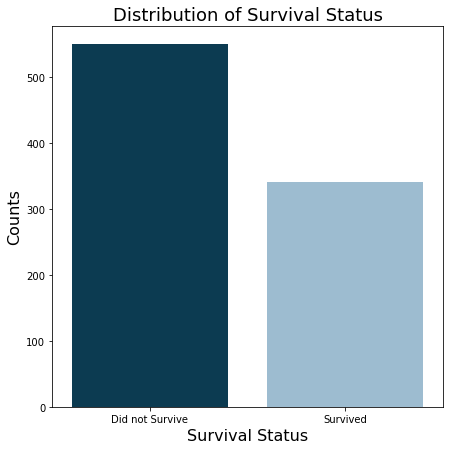

In [141]:
#visualise the outcome counts after banding
plt.figure(figsize = (7,7))

sns.countplot(x = titanic['Survived_renamed'], data = titanic, palette=['#003f5c', '#94bed9'])

plt.title('Distribution of Survival Status', fontsize=18)
plt.xlabel('Survival Status', fontsize=16)
plt.ylabel('Counts', fontsize=16)

In [135]:
#100% Distribution
cross_tab_prop_overall = pd.crosstab(index = "", columns=titanic['Survived_renamed'],
                             normalize="index")
cross_tab_prop_overall

Survived_renamed,Did not Survive,Survived
row_0,,
,0.617548,0.382452


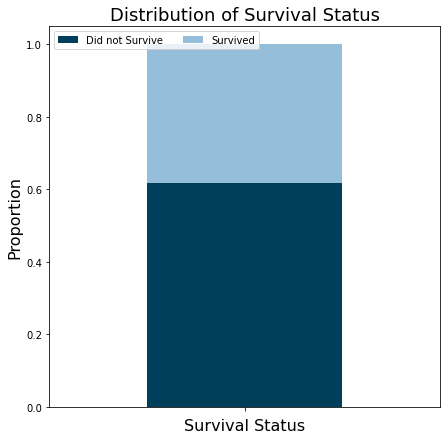

In [144]:
cross_tab_prop_overall.plot(kind='bar', 
                    stacked=True, 
                    color=['#003f5c', '#94bed9'], 
                    figsize=(7, 7))

plt.title('Distribution of Survival Status', fontsize=18)
plt.legend(loc="upper left", ncol=2)
plt.xlabel("Survival Status", fontsize=16)
plt.ylabel("Proportion", fontsize=16)
plt.show()

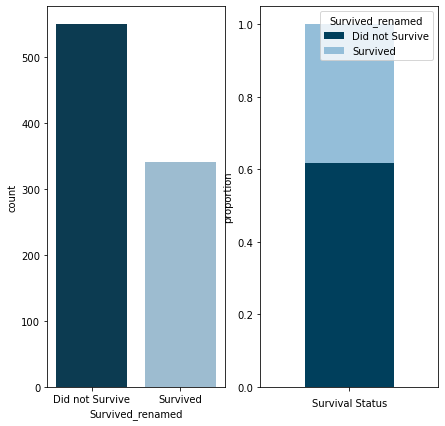

In [201]:
ig, axes = plt.subplots(1,2, figsize = (50,50), facecolor='white')

ax = sns.countplot(x = titanic['Survived_renamed'], data = titanic, palette=['#003f5c', '#94bed9'], ax=axes[0])
#ax1 = sns.countplot(x = titanic['Survived_renamed'], data = titanic, palette=['#003f5c'], ax=axes[1])
ax1 = cross_tab_prop_overall.plot(kind='bar', 
                    stacked=True, 
                    color=['#003f5c', '#94bed9'], 
                    figsize=(7, 7), xlabel = "Survival Status", ylabel = "proportion", ax=axes[1])

# 2. Survival Analysis

In [167]:
#100% Distribution
cross_tab_prop_Gender = pd.crosstab(index=titanic['Sex'],
                             columns=titanic['Survived_renamed'],
                             normalize="index")
cross_tab_prop_Gender

Survived_renamed,Did not Survive,Survived
Sex,,
female,0.259615,0.740385
male,0.811092,0.188908


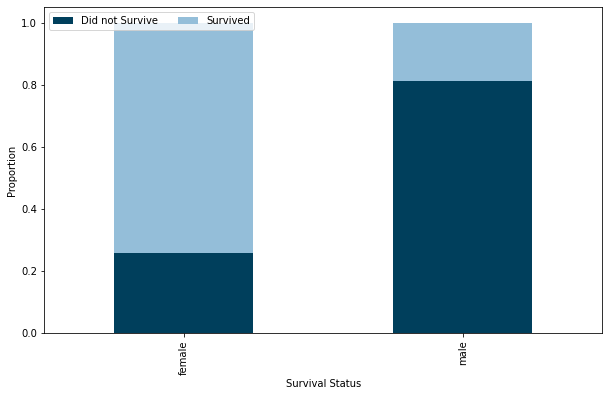

In [172]:
cross_tab_prop_Gender.plot(kind='bar', 
                    stacked=True, 
                    color=['#003f5c', '#94bed9'], 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Survival Status")
plt.ylabel("Proportion")
plt.show()

In [75]:
#Create by Gender first
# Establish the size of the figure.
plt.figure(figsize = (15, 15))

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

In [169]:
#List the columns needed
Cols = titanic[['Sex','Pclass','Family', 'Embarked','Survived_renamed']]

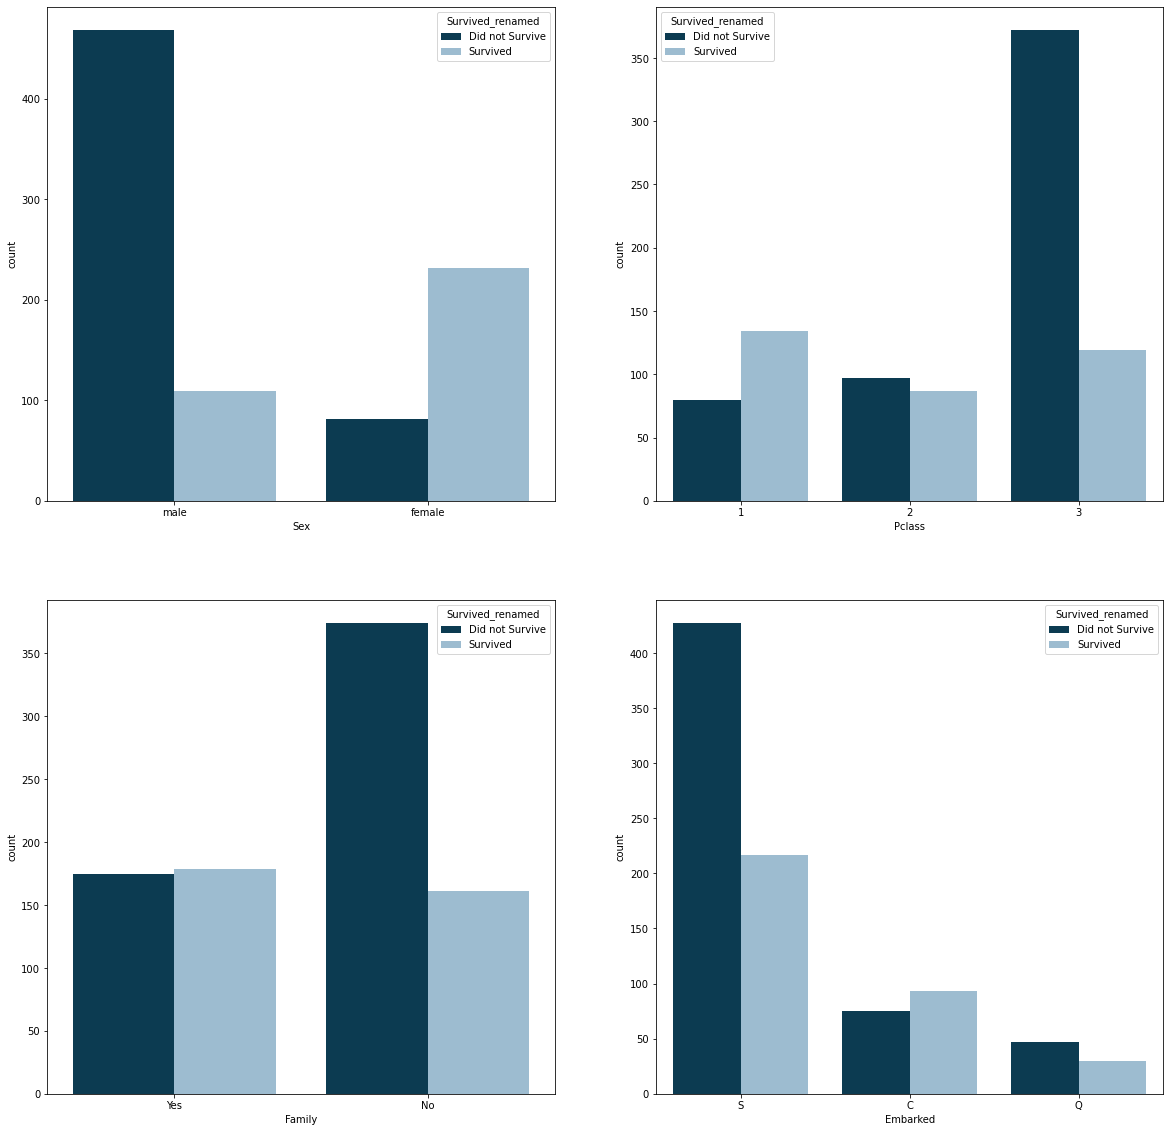

In [170]:
ig, axes = plt.subplots(2,2, figsize = (20,20), facecolor='white')

ax1 = sns.countplot(x='Sex', hue='Survived_renamed', data=Cols, palette=['#003f5c', '#94bed9'], ax=axes[0,0])
ax2 = sns.countplot(x='Pclass', hue='Survived_renamed', data=Cols, palette=['#003f5c', '#94bed9'], ax=axes[0,1])
ax3 = sns.countplot(x='Family', hue='Survived_renamed', data=Cols, palette=['#003f5c', '#94bed9'], ax=axes[1,0])
ax4 = sns.countplot(x='Embarked', hue='Survived_renamed', data=Cols, palette=['#003f5c', '#94bed9'], ax=axes[1,1])


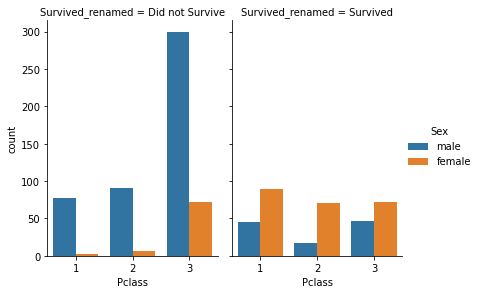

In [202]:
g = sns.catplot(x="Pclass", hue="Sex", col="Survived_renamed",
                data=titanic, kind="count",
                height=4, aspect=.7);